In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set a consistent style for the plots
sns.set_style("whitegrid")

In [8]:
# Define the path to the raw data directory
raw_data_path = os.path.join('..', 'data', 'raw')

# Construct the full path for each file
true_file_path = os.path.join(raw_data_path, 'WELFake_Dataset.csv')

# Load the datasets using the constructed paths
df = pd.read_csv(true_file_path)

In [9]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [10]:
# Display a concise summary of the DataFrame
print("DataFrame Information:")
df.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [11]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


label
1    37106
0    35028
Name: count, dtype: int64


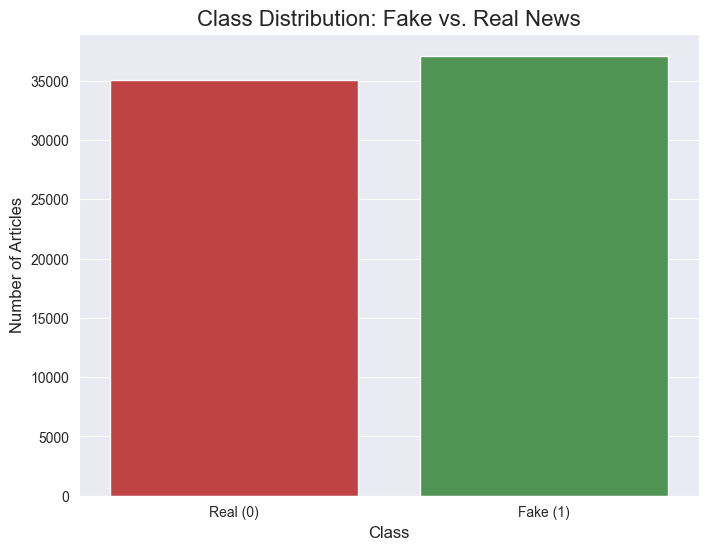

In [12]:
# Get the counts for each class
print(df['label'].value_counts())

# Visualize the class distribution
plt.figure(figsize=(8, 6))

# CORRECTED LINE: Assign 'label' to hue and set legend=False
sns.countplot(x='label', data=df, hue='label', palette=['#d32f2f', '#43a047'], legend=False)

plt.title('Class Distribution: Fake vs. Real News', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Real (0)', 'Fake (1)'])
plt.show()